In [5]:
import tensorflow as tf
import pandas as pd


In [6]:
##Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten,Dense


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
df=pd.read_csv("train-files-labels.csv")

In [8]:
df1=pd.read_csv("test-files-labels.csv")

In [9]:
datagen=ImageDataGenerator(rescale=1./255)

In [10]:

train_set=datagen.flow_from_dataframe(dataframe=df, directory="train", x_col="id", y_col="label", class_mode="binary", target_size=(64,64))


Found 98 validated image filenames belonging to 2 classes.


In [11]:

test_set=datagen.flow_from_dataframe(dataframe=df1, directory="test", x_col="id", y_col="label", class_mode="binary", target_size=(64,64))


Found 38 validated image filenames belonging to 2 classes.


In [ ]:
#df

In [12]:

classifier = Sequential()
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))



classifier.add(Flatten())
classifier.add(Dense(128,activation = 'relu'))
 

classifier.add(Dense(1, activation='sigmoid'))



In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [14]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])

In [16]:
classifier.fit(train_set,epochs=2,validation_data=test_set)

Epoch 1/2
4/4 [==============================] - 1s 282ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/2
4/4 [==============================] - 1s 294ms/step - loss: 0.6907 - accuracy: 0.6224 - val_loss: 0.6944 - val_accuracy: 0.5000


In [25]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('inference/cat1.jpg' ,target_size =(64,64))

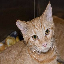

In [26]:
test_image

In [27]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [28]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image = test_image.reshape(1,64,64,3)

In [29]:
result = classifier.predict(test_image)

In [30]:
result

array([[0.9999932]], dtype=float32)

In [31]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
   prediction = 'cat'
    

In [32]:
prediction

'cat'